## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


c:\Users\19802\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\19802\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\19802\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\19802\anaconda3\envs\PythonData\lib\site-packages

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Look at APPLICATION_TYPE value counts for binning
count_type = application_df['APPLICATION_TYPE'].value_counts()
count_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace =list(count_type.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Look at CLASSIFICATION value counts for binning
classification= application_df['CLASSIFICATION'].value_counts()
classification


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C4500        1
C2600        1
C1570        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace= list(classification.iloc[:5].index)
cutoff_value_classification=1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

Other    32038
C7000      777
C1700      287
C4000      194
C5000      116
         ...  
C5200        1
C2600        1
C4500        1
C1570        1
C1728        1
Name: CLASSIFICATION, Length: 67, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
number_numeric= pd.get_dummies(application_df)
number_numeric.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10531628,1,108590,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10547893,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10553066,1,6692,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,10556103,1,142590,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:

# Split our preprocessed data into our features and target arrays
y = number_numeric['IS_SUCCESSFUL'].values
X = number_numeric.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

MemoryError: Unable to allocate 3.77 GiB for an array with shape (25724, 19681) and data type int64

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_number = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_number, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 840       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
     

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.6086 - acc: 0.6935
Epoch 2/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5724 - acc: 0.7227
Epoch 3/100
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5670 - acc: 0.7242
Epoch 4/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5642 - acc: 0.7248
Epoch 5/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5627 - acc: 0.7268
Epoch 6/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5613 - acc: 0.72670s - loss: 0.5586 - 
Epoch 7/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5602 - acc: 0.7264
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5599 - acc: 0.7267
Epoch 9/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5597 - acc: 0.7275
Epoch 10/100
25724/25724 [===========================

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5631 - acc: 0.7333
Loss: 0.5631241679747667, Accuracy: 0.7332944869995117


In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_dim = len(X_train[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 14
hidden_nodes_layer3 = 21


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_dim, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 7)                 735       
_________________________________________________________________
dense_16 (Dense)             (None, 14)                112       
_________________________________________________________________
dense_17 (Dense)             (None, 21)                315       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 22        
Total params: 1,184
Trainable params: 1,184
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
     

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
25724/25724 [==============================] - 2s 62us/sample - loss: 0.6068 - acc: 0.6891
Epoch 2/200
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5722 - acc: 0.7240
Epoch 3/200
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5671 - acc: 0.7263
Epoch 4/200
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5644 - acc: 0.7263
Epoch 5/200
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5624 - acc: 0.7276
Epoch 6/200
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5617 - acc: 0.7273
Epoch 7/200
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5609 - acc: 0.7283
Epoch 8/200
25724/25724 [==============================] - 2s 88us/sample - loss: 0.5604 - acc: 0.7282
Epoch 9/200
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5598 - acc: 0.7279
Epoch 10/200
25724/25724 [==============================] - 2s 74us/sampl

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5745 - acc: 0.7303
Loss: 0.5745299908440593, Accuracy: 0.7302623987197876


In [41]:
import h5py
print(h5py.__version__)

3.7.0


In [ ]:
# Export our model to HDF5 file
filepath= r"C:\Users\19802\Desktop\UNCC_bootcamp_03-23\Challenge _module01\module_21_deep_learning_21\AlphabetSoupCharity.h5"
nn.save(filepath,save_format='h5')

In [43]:
scorse =pd.DataFrame(fit_model.history)
scorse

,loss,acc
0,0.616416,0.694993
1,0.571213,0.726053
2,0.565102,0.726442
3,0.562683,0.728269
4,0.561945,0.728114
...,...,...
95,0.552325,0.732507
96,0.552352,0.733945
97,0.552612,0.732545
98,0.552251,0.732157


In [30]:
import matplotlib.pyplot as plt

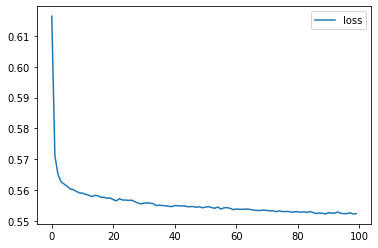

In [44]:
#  plot the loss
scorse.plot(y='loss')

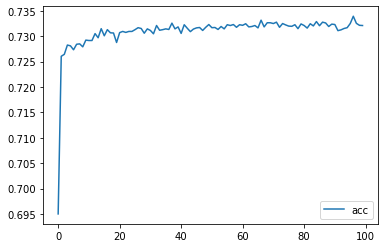

In [45]:
#  plot the accuracy
scorse.plot(y='acc')